Devadharshika S S
21BRS1306
Assignment 5


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Income                  200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

First Few Rows of the Dataset:
   CustomerID  Gender  Age  Income  Spending Score (1-100)
0           1    Male   19      15                      39
1           2    Male   21      15                      81
2           3  Female   20      16                       6
3           4  Female   23      16                      77
4           5  Female   31      17                      40

Summary Statistics:
       CustomerID         Age      Income  Spendi

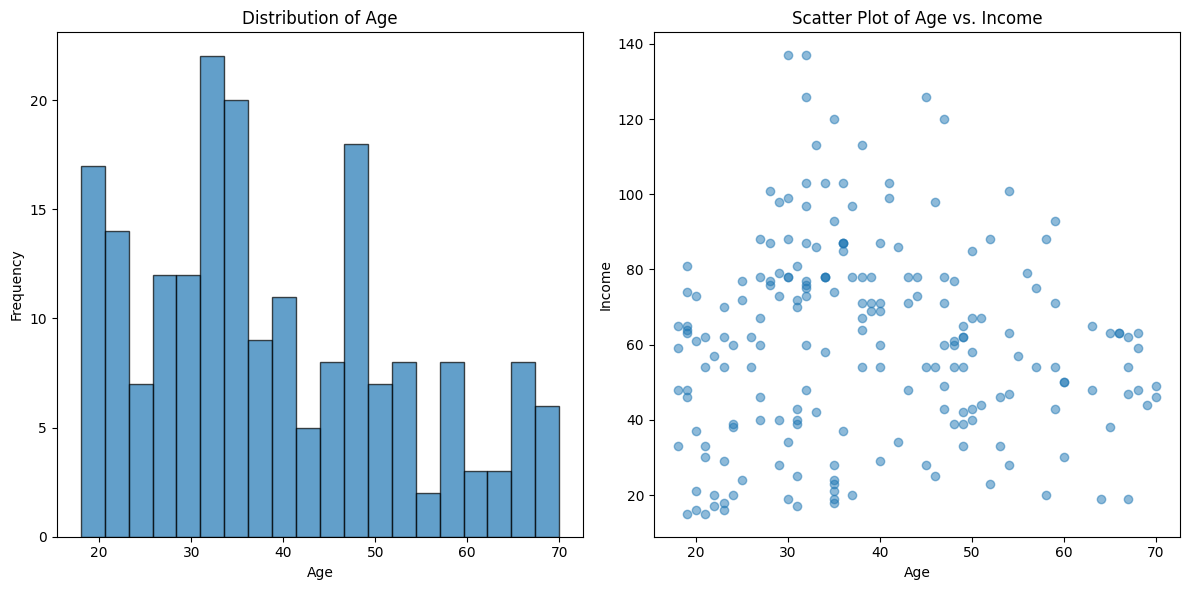

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('Mall_Customers.csv')

print("Dataset Information:")
print(data.info())

print("\nFirst Few Rows of the Dataset:")
print(data.head())

print("\nSummary Statistics:")
print(data.describe())

print("\nMissing Values:")
print(data.isnull().sum())

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(data['Age'], bins=20, edgecolor='k', alpha=0.7)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.scatter(data['Age'], data['Income'], alpha=0.5)
plt.title('Scatter Plot of Age vs. Income')
plt.xlabel('Age')
plt.ylabel('Income')

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

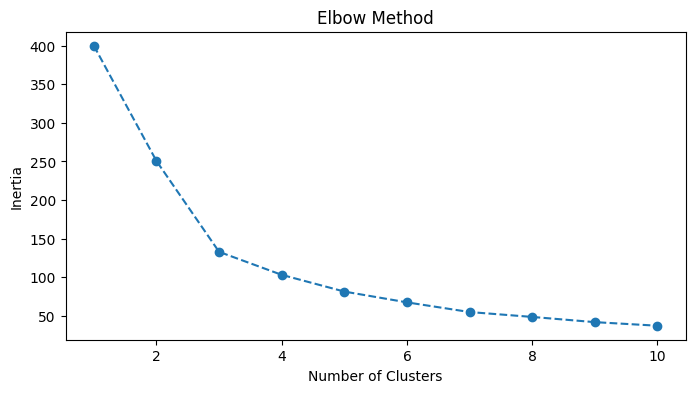

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


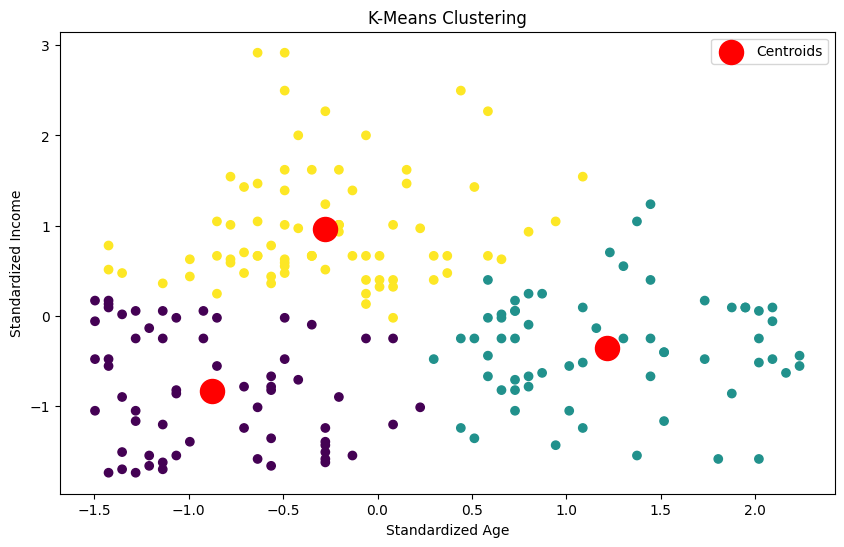


Cluster 0 Characteristics:
       CustomerID        Age     Income  Spending Score (1-100)  Cluster
count   62.000000  62.000000  62.000000               62.000000     62.0
mean    50.483871  26.661290  38.790323               56.806452      0.0
std     35.438583   6.731242  16.531279               21.233162      0.0
min      1.000000  18.000000  15.000000                6.000000      0.0
25%     20.250000  21.000000  23.250000               43.000000      0.0
50%     43.000000  24.500000  38.500000               55.000000      0.0
75%     81.250000  31.750000  54.000000               73.000000      0.0
max    116.000000  42.000000  65.000000               99.000000      0.0

Cluster 1 Characteristics:
       CustomerID        Age     Income  Spending Score (1-100)  Cluster
count   62.000000  62.000000  62.000000               62.000000     62.0
mean    78.080645  55.806452  51.225806               39.677419      1.0
std     38.830569   7.962697  15.906921               17.154815     

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


X = data[['Age', 'Income']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

optimal_num_clusters = 3  # Adjust as needed

kmeans = KMeans(n_clusters=optimal_num_clusters, random_state=42)
kmeans.fit(X_scaled)

data['Cluster'] = kmeans.labels_

plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('Standardized Age')
plt.ylabel('Standardized Income')
plt.legend()
plt.show()

for cluster_id in range(optimal_num_clusters):
    cluster_data = data[data['Cluster'] == cluster_id]
    print(f'\nCluster {cluster_id} Characteristics:')
    print(cluster_data.describe())
